loading libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

ModuleNotFoundError: No module named 'matplotlib'

dataset

In [18]:
df_dataset_original = pd.read_csv('datasets/olist_orders_dataset.csv')
df_order = df_dataset_original.copy()

initial visualization

In [19]:
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


 items dataframe

In [20]:
df_items_original = pd.read_csv('datasets/olist_order_items_dataset.csv')
df_items = df_items_original.copy()

In [21]:
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


null values

In [22]:
df_order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [23]:
df_order = df_order.dropna(subset=["order_delivered_customer_date", "order_delivered_carrier_date", "order_approved_at"])

In [24]:
df_order.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

combine dataframes orders info and orders

In [25]:
df_combined = df_order.merge(df_items, on='order_id',how='inner')

convert dates to datetime format

In [26]:
df_combined['order_purchase_timestamp'] = pd.to_datetime(df_combined['order_purchase_timestamp'])
df_combined['order_approved_at'] = pd.to_datetime(df_combined['order_approved_at'])
df_combined['order_delivered_carrier_date'] = pd.to_datetime(df_combined['order_delivered_carrier_date'])
df_combined['order_delivered_customer_date'] = pd.to_datetime(df_combined['order_delivered_customer_date'])
df_combined['order_estimated_delivery_date'] = pd.to_datetime(df_combined['order_estimated_delivery_date'])


calculate the real time delivery

In [27]:
df_combined['delivery_time'] = (df_combined['order_delivered_customer_date'] - df_combined['order_purchase_timestamp']).dt.days

splitting the datasets

In [28]:
X = df_combined[['price', 'freight_value']]
y = df_combined['delivery_time'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

train the model

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

evaluate the model

In [30]:
y_pred = model.predict(X_test)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  6.08720118456212


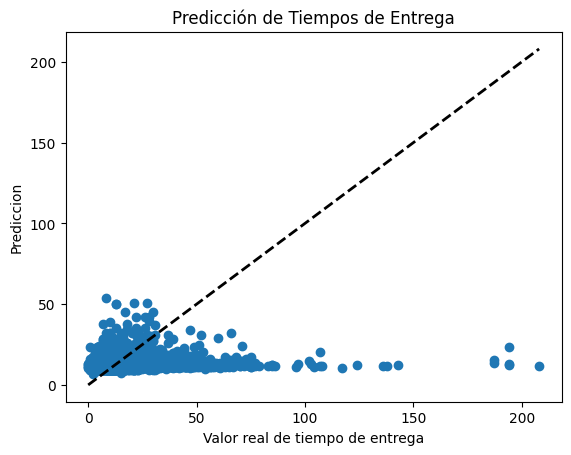

In [31]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valor real de tiempo de entrega')
plt.ylabel('Prediccion')
plt.title('Predicción de Tiempos de Entrega')
plt.show()